## The goal here is EDA and Classification

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
df = pd.read_csv("/content/train_set.csv", error_bad_lines=None)
df = df.drop(['_temporary_index_column'],axis=1)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.dtypes

patient_id         int64
timestamp         object
measurement_x    float64
measurement_y    float64
measurement_z    float64
label            float64
dtype: object

In [ ]:
df.tail(2)

,patient_id,timestamp,measurement_x,measurement_y,measurement_z,label
196717,6264,2012-10-29 09:35:14.595852,0.607564,0.139367,0.059033,0.0
196718,6264,2012-10-29 09:35:14.645852,0.611717,0.142630,0.054631,NaN


In [ ]:
df.shape

(196719, 6)

In [ ]:
df.groupby(['patient_id']).mean()

,measurement_x,measurement_y,measurement_z,label
patient_id,,,,
0,0.780557,-0.100936,0.061689,1.0
1,0.781661,-0.096927,0.061907,1.0
2,0.781661,-0.096927,0.061907,1.0
3,0.781661,-0.096927,0.061907,1.0
4,1.014278,0.143395,0.077963,1.0
...,...,...,...,...
6260,0.403571,0.280378,0.062419,0.0
6261,0.403571,0.280378,0.062419,0.0
6262,0.624782,0.155807,0.041285,0.0


In [ ]:
df.groupby(['patient_id']).value_counts()

patient_id  timestamp                   measurement_x  measurement_y  measurement_z  label
0           2015-12-29 14:50:34.095000  0.811802        0.015569      0.068855       1.0      1
            2015-12-29 14:50:34.145000  0.808880        0.007757      0.073745       1.0      1
            2015-12-29 14:50:35.395000  0.762632       -0.194961      0.032832       1.0      1
            2015-12-29 14:50:35.445000  0.761877       -0.203266      0.029381       1.0      1
            2015-12-29 14:50:35.495000  0.761207       -0.211579      0.026595       1.0      1
                                                                                             ..
6264        2012-10-29 09:35:14.395852  0.590675        0.126678      0.054897       0.0      1
            2012-10-29 09:35:14.445852  0.594938        0.129795      0.054389       0.0      1
            2012-10-29 09:35:14.495852  0.599174        0.132950      0.055727       0.0      1
            2012-10-29 09:35:14.545852  0.603

## Scale the data to 0-1
- As seen below in the figures. The data is mostly distributed normally and therefore no need in normalization only scaling.
- Drop NA only one last row


In [ ]:
## Scaling the data to 0-1

colors = ["#458B00",	"#0101DF", "#DF0101"]
from sklearn import preprocessing

df_original = df

min_max_scaler  = preprocessing.MinMaxScaler()

df[['measurement_x',
       'measurement_y', 'measurement_z']] = min_max_scaler.fit_transform(df[['measurement_x',
       'measurement_y', 'measurement_z']])


#df = df.dropna()
#df = df.drop(['_temporary_index_column'], axis=1)
df.columns

Index(['patient_id', 'timestamp', 'measurement_x', 'measurement_y',
       'measurement_z', 'label'],
      dtype='object')

## Convert timestamp from object to datetime
## Remove the date from the timestemp

In [ ]:
# Convert timestamp from object to dateime
# Remove the date from the timestemp

df["timestamp"] = pd.to_datetime(df["timestamp"])

df['time'] = df['timestamp'].apply(lambda x: x.value)

df.dtypes


patient_id                int64
timestamp        datetime64[ns]
measurement_x           float64
measurement_y           float64
measurement_z           float64
label                   float64
time                      int64
dtype: object

## Plot Distribution of number of measurements per patient

Text(0, 0.5, 'Counts')

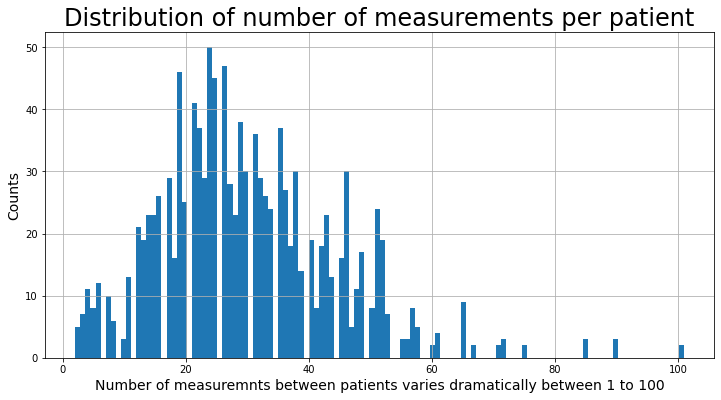

In [ ]:
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
df.groupby("patient_id").count()["measurement_x"].hist(bins=120,ax = ax)
ax.set_title("Distribution of number of measurements per patient", fontsize=24)
ax.set_xlabel('Number of measuremnts between patients varies dramatically between 1 to 100',fontdict={'fontsize':14})
ax.set_ylabel('Counts',fontdict={'fontsize':14})

Some patients have only one row this would not allow extracting coefficients using polyfit

# EDA as a function of time
It seems that x and y are always linear and thus can be expressed through one point and their slope.
While z is parabolic.

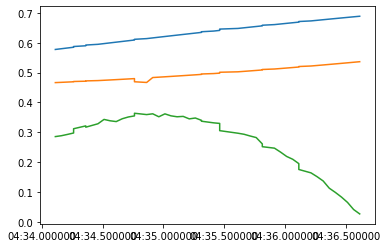

In [ ]:
id = 62
patient = df[df["patient_id"] == id]

plt.figure()
plt.plot(patient.timestamp, patient.measurement_x)
plt.plot(patient.timestamp, patient.measurement_y)
plt.plot(patient.timestamp, patient.measurement_z)

#np.polyfit(x.timestamp, x.measurement_x, 1)


In [ ]:
value_counts_label = df['label'].value_counts(dropna=True, sort=True)
value_counts_label

0.0    41672
1.0    12056
2.0     4793
Name: label, dtype: int64

Text(0, 0.5, '')

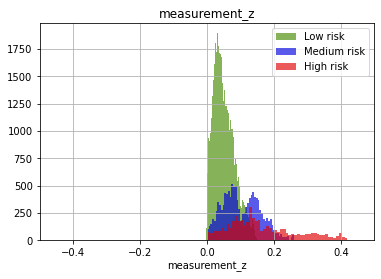

In [ ]:
# Plot histogram without groupby

ax1 = plt.subplot(111)

df[df['label']== 0]['measurement_z'].hist(ax=ax1, bins=50, alpha=0.65, color=colors[0], label='Low risk')
df[df['label']== 1]['measurement_z'].hist(ax=ax1, bins=50, alpha=0.65, color=colors[1], label='Medium risk')
df[df['label']== 2]['measurement_z'].hist(ax=ax1, bins=50, alpha=0.65, color=colors[2], label='High risk')
ax1.set_xlim(-0.5,0.5)
ax1.legend(loc='best')

plt.title("measurement_z")

plt.xlabel("measurement_z")
plt.ylabel("")

(-1.0, 2.0)

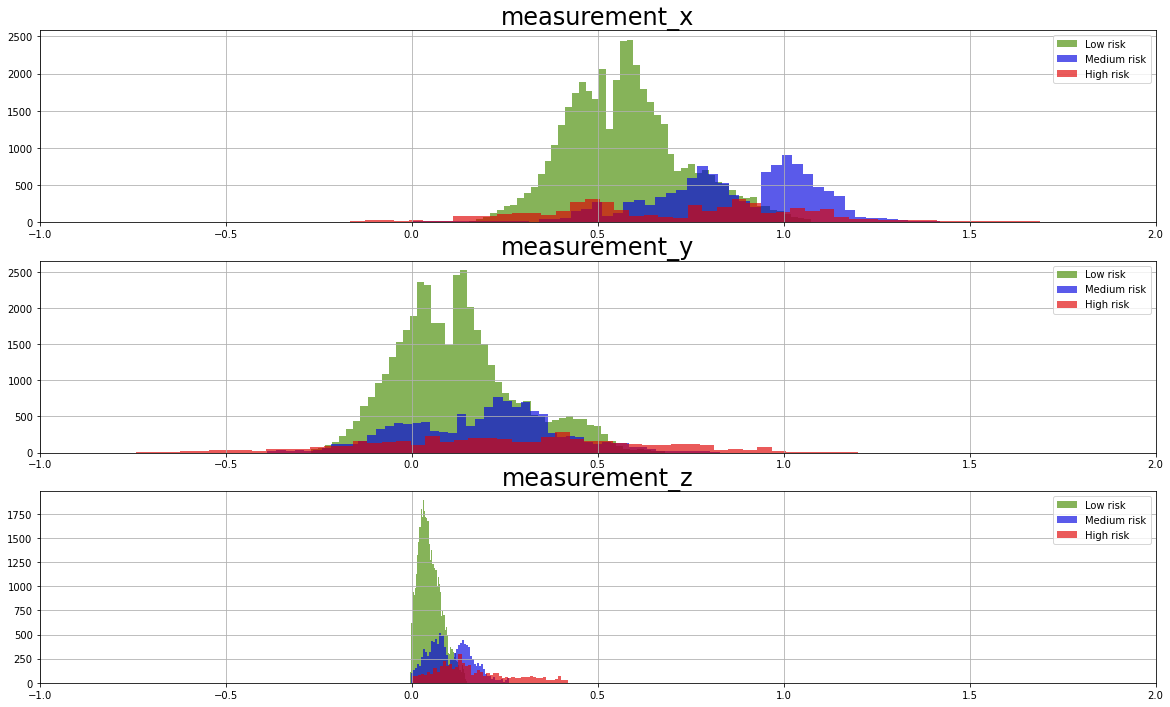

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,12))

df[df['label']== 0]['measurement_x'].hist(ax=ax1, bins=50, alpha=0.65, color=colors[0], label='Low risk')
df[df['label']== 1]['measurement_x'].hist(ax=ax1, bins=50, alpha=0.65, color=colors[1], label='Medium risk')
df[df['label']== 2]['measurement_x'].hist(ax=ax1, bins=50, alpha=0.65, color=colors[2], label='High risk')
ax1.set_title("measurement_x", fontsize=24)
ax1.legend(loc='best')
ax1.set_xlim(-1,2)

df[df['label']== 0]['measurement_y'].hist(ax=ax2, bins=50, alpha=0.65, color=colors[0], label='Low risk')
df[df['label']== 1]['measurement_y'].hist(ax=ax2, bins=50, alpha=0.65, color=colors[1], label='Medium risk')
df[df['label']== 2]['measurement_y'].hist(ax=ax2, bins=50, alpha=0.65, color=colors[2], label='High risk')
ax2.set_title("measurement_y", fontsize=24)
ax2.legend(loc='best')
ax2.set_xlim(-1,2)


df[df['label']== 0]['measurement_z'].hist(ax=ax3, bins=50, alpha=0.65, color=colors[0], label='Low risk')
df[df['label']== 1]['measurement_z'].hist(ax=ax3, bins=50, alpha=0.65, color=colors[1], label='Medium risk')
df[df['label']== 2]['measurement_z'].hist(ax=ax3, bins=50, alpha=0.65, color=colors[2], label='High risk')
ax3.set_title("measurement_z", fontsize=24)
ax3.legend(loc='best')
ax3.set_xlim(-1,2)


## Histogram of the three measurements (x,y,z) after scaling and density normalization

(-0.1, 1.1)

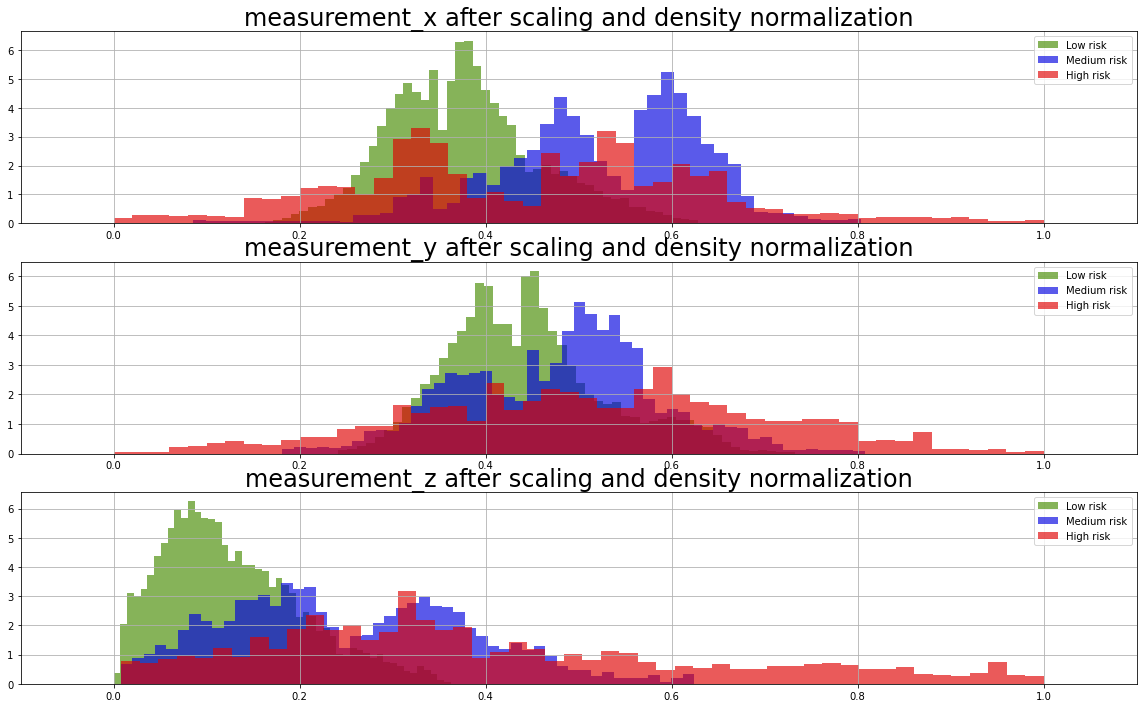

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,12))

df[df['label']== 0]['measurement_x'].hist(ax=ax1, bins=50, alpha=0.65, density=True, color=colors[0], label='Low risk')
df[df['label']== 1]['measurement_x'].hist(ax=ax1, bins=50, alpha=0.65, density=True, color=colors[1], label='Medium risk')
df[df['label']== 2]['measurement_x'].hist(ax=ax1, bins=50, alpha=0.65, density=True, color=colors[2], label='High risk')
ax1.set_title("measurement_x after scaling and density normalization", fontsize=24)
ax1.legend(loc='best')
ax1.set_xlim(-0.1,1.1)

df[df['label']== 0]['measurement_y'].hist(ax=ax2, bins=50, alpha=0.65, density=True, color=colors[0], label='Low risk')
df[df['label']== 1]['measurement_y'].hist(ax=ax2, bins=50, alpha=0.65, density=True, color=colors[1], label='Medium risk')
df[df['label']== 2]['measurement_y'].hist(ax=ax2, bins=50, alpha=0.65, density=True, color=colors[2], label='High risk')
ax2.set_title("measurement_y after scaling and density normalization", fontsize=24)
ax2.legend(loc='best')
ax2.set_xlim(-0.1,1.1)


df[df['label']== 0]['measurement_z'].hist(ax=ax3, bins=50, alpha=0.65, density=True, color=colors[0], label='Low risk')
df[df['label']== 1]['measurement_z'].hist(ax=ax3, bins=50, alpha=0.65, density=True, color=colors[1], label='Medium risk')
df[df['label']== 2]['measurement_z'].hist(ax=ax3, bins=50, alpha=0.65, density=True, color=colors[2], label='High risk')
ax3.set_title("measurement_z after scaling and density normalization", fontsize=24)
ax3.legend(loc='best')
ax3.set_xlim(-0.1,1.1)

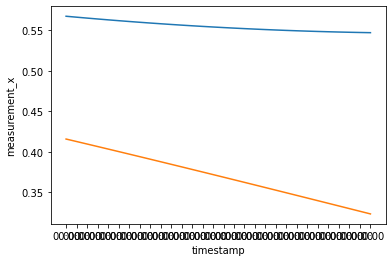

In [ ]:
import matplotlib.dates
ax = plt.subplot()
sns.lineplot(x="timestamp", y="measurement_x", data=df_scaled[df_scaled['patient_id'] == 0])
sns.lineplot(x="timestamp", y="measurement_y", data=df_scaled[df_scaled['patient_id'] == 0])

ax.xaxis.set_major_formatter(
    matplotlib.dates.DateFormatter("%H:%M")
)

plt.show()

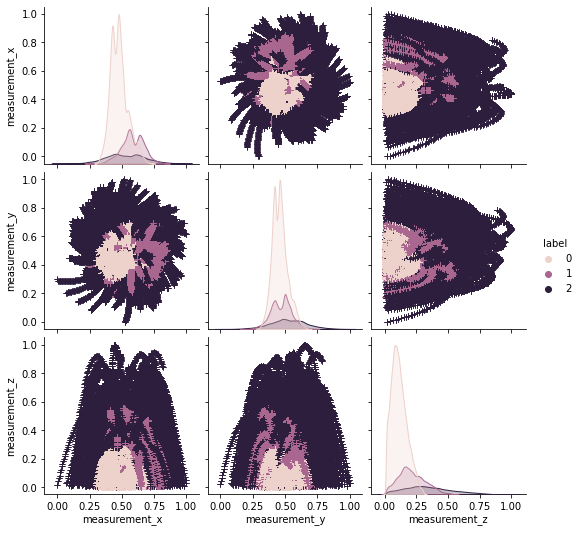

In [ ]:
# explore the behavior in time
sns.pairplot(df_scaled, hue='label', vars=['measurement_x','measurement_y', 'measurement_z'], plot_kws=dict(marker="+", linewidth=1))

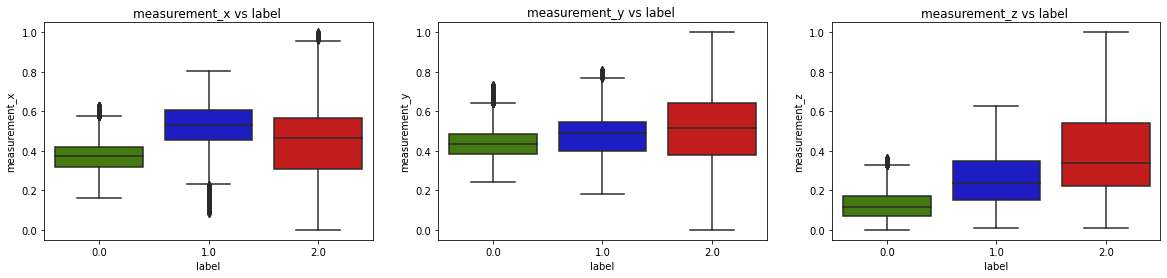

In [ ]:
## box plot to show distributions with respect to categories

f, axes = plt.subplots(ncols=3, figsize=(20,4))
colors = ["#458B00",	"#0101DF", "#DF0101"]

sns.boxplot(x="label", y="measurement_x", data=df_scaled_wo_nan, palette=colors, ax=axes[0])
axes[0].set_title('measurement_x vs label ')

sns.boxplot(x="label", y="measurement_y", data=df_scaled_wo_nan, palette=colors, ax=axes[1])
axes[1].set_title('measurement_y vs label ')

sns.boxplot(x="label", y="measurement_z", data=df_scaled_wo_nan, palette=colors, ax=axes[2])
axes[2].set_title('measurement_z vs label ')


plt.show()

Text(0.5, 1.0, 'Correlation Matrix w/o feature engineering N = 58521')

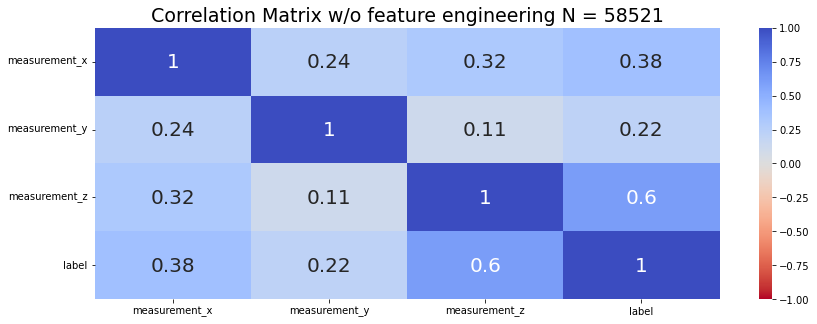

In [ ]:
# plot Entire DataFrame but without feature engineering N =

f, ax1 = plt.subplots(1, 1, figsize=(14,5))

df_wo_extra_columns = df.drop(['time', 'patient_id', 'timestamp'], axis=1)

corr = df_wo_extra_columns.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, vmin=-1, vmax=1, annot = True)
ax1.set_title("Correlation Matrix w/o feature engineering N = 58521", fontsize=19)

## From Time-serious to tabular matrix
# Extract coeficients using polyfit

In [ ]:

# The goal is to build new features from the measurement x, y and z
# ... because in time domain there is no much information
#... bc the length (timestamp) of each patient_id is different, we will need to do zero padding to the longest (101) timeserious to do LSTM, CNN 1D
# ... to extract the coeficient use polyfit with 1st degree on the x, and y.
# and 2nd degree for the z because it behaves as polynom the results will be the new columns

# TO DO: Extract residual from the measurements

import matplotlib.dates as dates
import warnings
warnings.filterwarnings("ignore")

# convert the timestemp to values
#df['time'] = df['timestamp'].apply(lambda x: x.value)


#df_id_index = df.set_index('patient_id')
df_id_index = pd.DataFrame()
# find the slope and intercept for measurement X
df_id_index['fit_measurement_x'] = df.groupby('patient_id').apply(lambda d: np.polyfit(d.time, d.measurement_x, 1))
df_id_index[['slope_measurement_x', 'intercept_measurement_x']] = df_id_index.fit_measurement_x.apply(pd.Series)
df_id_index = df_id_index.drop(columns='fit_measurement_x')

# find the slope and intercept for measurement Y
df_id_index['fit_measurement_y'] = df.groupby('patient_id').apply(lambda d: np.polyfit(d.time, d.measurement_y, 1))
df_id_index[['slope_measurement_y', 'intercept_measurement_y']] = df_id_index.fit_measurement_y.apply(pd.Series)
df_id_index = df_id_index.drop(columns='fit_measurement_y')


# find the slope and intercept for measurement Z with second degree
df_id_index['fit_measurement_z'] = df.groupby('patient_id').apply(lambda d: np.polyfit(d.time, d.measurement_z, 2))
df_id_index[['a_measurement_z', 'b_measurement_z', 'c_measurement_z']] = df_id_index.fit_measurement_z.apply(pd.Series)
df_id_index = df_id_index.drop(columns='fit_measurement_z')

# need to add the label from the original df
df_id_index["label"] = df.groupby("patient_id").mean()["label"]

#df_id_index.head()

# NEED TO REMOVE THE LAST ROW because it has NaN
df_id_index = df_id_index[:-1]

df_id_index.tail()

# z = np.polyfit(mdates.date2num(df.timestamp), df.measurement_x, 1)
# df_id_index = df_id_index.drop(columns='fit_measurement_x')

,slope_measurement_x,intercept_measurement_x,slope_measurement_y,intercept_measurement_y,a_measurement_z,b_measurement_z,c_measurement_z,label
patient_id,,,,,,,,
1175,4.823772e-11,-6.624051e+07,-2.435294e-11,3.344170e+07,4.744682e-29,-2.652324e-17,-8.947069e+07,1.0
1176,5.109574e-11,-7.016517e+07,-2.580172e-11,3.543117e+07,4.999839e-29,-2.822300e-17,-9.428220e+07,1.0
1177,-7.793807e-12,1.054474e+07,3.487725e-11,-4.718767e+07,-2.014441e-29,-4.260174e-18,3.687459e+07,0.0
1178,-7.711677e-12,1.043362e+07,3.460148e-11,-4.681455e+07,-1.977612e-29,5.558245e-18,3.620041e+07,0.0
1179,-7.855142e-12,1.062773e+07,3.532216e-11,-4.778961e+07,-2.006683e-29,-1.624576e-18,3.673258e+07,0.0


In [ ]:
# Scaling
from sklearn import preprocessing

df_agg = df_id_index.copy()
min_max_scaler  = preprocessing.MinMaxScaler()

features = ["slope_measurement_x",
            "intercept_measurement_x",
            "slope_measurement_y",
            "intercept_measurement_y",
            "a_measurement_z",
            "b_measurement_z",
            "c_measurement_z"]

df_agg[features] = min_max_scaler.fit_transform(df_agg[features])
df_agg.head()

,slope_measurement_x,intercept_measurement_x,slope_measurement_y,intercept_measurement_y,a_measurement_z,b_measurement_z,c_measurement_z,label
patient_id,,,,,,,,
0,0.413356,0.589992,0.219867,0.790441,2.388645e-29,2.771380e-16,0.898154,1.0
1,0.411483,0.591931,0.220263,0.790039,2.600788e-29,2.796692e-16,0.885581,1.0
2,0.411483,0.591931,0.220262,0.790040,2.600788e-29,2.841745e-16,0.885581,1.0
3,0.411483,0.591931,0.220262,0.790040,2.600788e-29,2.792577e-16,0.885581,1.0
4,0.761972,0.243316,0.569657,0.437323,8.065205e-29,2.721322e-16,0.577668,1.0


In [ ]:
sns.pairplot(df_agg, hue='label', plot_kws=dict(marker="+", linewidth=1))

In [ ]:
sns.heatmap(df_agg.corr(), annot=True)

Functionalization of preprocessing and feature extraction

In [ ]:
def extract_patient_stats(df):

    # Group the input dataframe by patient_id
    grouped = df.groupby('patient_id')

    # Use agg to calculate mean, std, max, min for x, y, and z for each group
    agg_dict = {
        'measurement_x': ['mean', 'std', 'max', 'min'],
        'measurement_y': ['mean', 'std', 'max', 'min'],
        'measurement_z': ['mean', 'std', 'max', 'min']
    }
    patient_stats = grouped.agg(agg_dict)

    # Flatten the resulting dataframe's multi-index columns
    patient_stats.columns = [f"{col[0]}_{col[1]}" for col in patient_stats.columns]

    return patient_stats.reset_index()

test_function_extraction = extract_patient_stats(df.drop(columns="timestamp"))

test_function_extraction.head()

,patient_id,measurement_x_mean,measurement_x_std,measurement_x_max,measurement_x_min,measurement_y_mean,measurement_y_std,measurement_y_max,measurement_y_min,measurement_z_mean,measurement_z_std,measurement_z_max,measurement_z_min
0,0,0.525537,0.007067,0.539500,0.516629,0.312309,0.030630,0.362164,0.261401,0.142070,0.039804,0.182118,0.044226
1,1,0.526031,0.007472,0.540841,0.516629,0.314024,0.031594,0.365494,0.261401,0.142545,0.039225,0.182118,0.044226
2,2,0.526031,0.007472,0.540841,0.516629,0.314024,0.031594,0.365494,0.261401,0.142545,0.039225,0.182118,0.044226
3,3,0.526031,0.007472,0.540841,0.516629,0.314024,0.031594,0.365494,0.261401,0.142545,0.039225,0.182118,0.044226
4,4,0.629983,0.011894,0.648547,0.611318,0.416865,0.005458,0.421763,0.399192,0.177539,0.016330,0.196618,0.141450


In [ ]:
df.dtypes

patient_id         int64
timestamp         object
measurement_x    float64
measurement_y    float64
measurement_z    float64
label            float64
dtype: object

## ## From Time-serious to tabular matrix: Build features
# mean, max, min std,

In [ ]:
# Build new features Mean, Min, Max, std
df_new = extract_patient_stats(df)
df_new.head()

,patient_id,measurement_x_mean,measurement_x_std,measurement_x_max,measurement_x_min,measurement_y_mean,measurement_y_std,measurement_y_max,measurement_y_min,measurement_z_mean,measurement_z_std,measurement_z_max,measurement_z_min
0,0,0.525537,0.007067,0.539500,0.516629,0.312309,0.030630,0.362164,0.261401,0.142070,0.039804,0.182118,0.044226
1,1,0.526031,0.007472,0.540841,0.516629,0.314024,0.031594,0.365494,0.261401,0.142545,0.039225,0.182118,0.044226
2,2,0.526031,0.007472,0.540841,0.516629,0.314024,0.031594,0.365494,0.261401,0.142545,0.039225,0.182118,0.044226
3,3,0.526031,0.007472,0.540841,0.516629,0.314024,0.031594,0.365494,0.261401,0.142545,0.039225,0.182118,0.044226
4,4,0.629983,0.011894,0.648547,0.611318,0.416865,0.005458,0.421763,0.399192,0.177539,0.016330,0.196618,0.141450


In [ ]:
df_new.isna().sum()

patient_id            0
measurement_x_mean    0
measurement_x_std     0
measurement_x_max     0
measurement_x_min     0
measurement_y_mean    0
measurement_y_std     0
measurement_y_max     0
measurement_y_min     0
measurement_z_mean    0
measurement_z_std     0
measurement_z_max     0
measurement_z_min     0
dtype: int64

In [ ]:
df_new.columns

Index(['patient_id', 'measurement_x_mean', 'measurement_x_std',
       'measurement_x_max', 'measurement_x_min', 'measurement_y_mean',
       'measurement_y_std', 'measurement_y_max', 'measurement_y_min',
       'measurement_z_mean', 'measurement_z_std', 'measurement_z_max',
       'measurement_z_min'],
      dtype='object')

In [ ]:
## Scaling
from sklearn import preprocessing

min_max_scaler  = preprocessing.MinMaxScaler()

features = ['measurement_x_mean', 'measurement_x_std',
       'measurement_x_max', 'measurement_x_min', 'measurement_y_mean',
       'measurement_y_std', 'measurement_y_max', 'measurement_y_min',
       'measurement_z_mean', 'measurement_z_std', 'measurement_z_max',
       'measurement_z_min']


# features = ['mean_x', 'mean_y', 'mean_z', 'min_x', 'min_y', 'min_z',
#        'max_x', 'max_y', 'max_z', 'std_x', 'std_y', 'std_z']

df_new[features] = min_max_scaler.fit_transform(df_new[features])
# add label to the matrix
df_new["label"] = df.groupby("patient_id").mean()["label"]
df_new.head()

,patient_id,measurement_x_mean,measurement_x_std,measurement_x_max,measurement_x_min,measurement_y_mean,measurement_y_std,measurement_y_max,measurement_y_min,measurement_z_mean,measurement_z_std,measurement_z_max,measurement_z_min,label
0,0,0.521482,0.052073,0.337379,0.778280,0.277251,0.258726,0.127715,0.423862,0.137579,0.162177,0.152932,0.083332,1.0
1,1,0.522263,0.055120,0.339310,0.778280,0.279787,0.266893,0.132268,0.423862,0.138138,0.159725,0.152932,0.083332,1.0
2,2,0.522263,0.055120,0.339310,0.778280,0.279787,0.266893,0.132268,0.423862,0.138138,0.159725,0.152932,0.083332,1.0
3,3,0.522263,0.055120,0.339310,0.778280,0.279787,0.266893,0.132268,0.423862,0.138138,0.159725,0.152932,0.083332,1.0
4,4,0.686902,0.088385,0.494289,0.920924,0.431789,0.045441,0.209219,0.647291,0.179337,0.062907,0.167950,0.266523,1.0


Text(0.5, 1.0, 'Correlation Matrix w feature engineering')

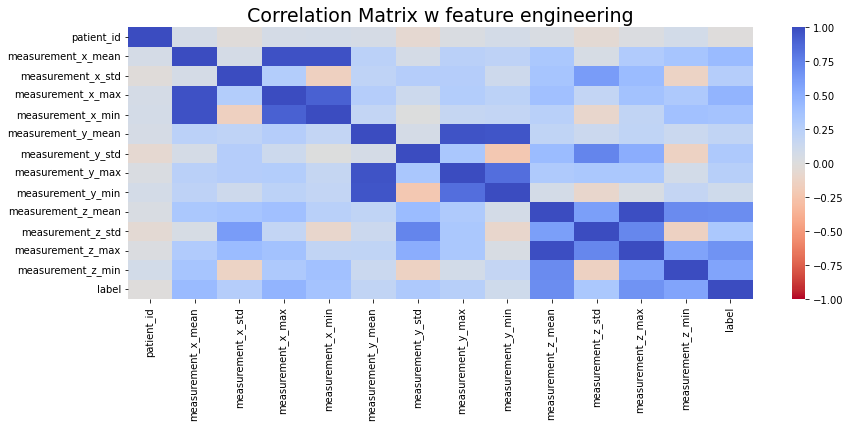

In [ ]:
# plot correlation matrix
f, ax1 = plt.subplots(1, 1, figsize=(14,5))
sns.heatmap(df_new.corr(), cmap='coolwarm_r', annot_kws={'size':20}, vmin=-1, vmax=1, annot = False)
ax1.set_title("Correlation Matrix w feature engineering", fontsize=19)


# Run Random Forest Classifier





In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df_new = df_new.dropna()
X = df_new.drop(['label'], axis=1)
y = df_new["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=10)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

rfc = RandomForestClassifier(class_weight="balanced")

rfc.fit(X_train, y_train)

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print('Classification on Training set')
print(classification_report(y_train, y_train_pred))

print('\n Classification on Test set')
print(classification_report(y_test, y_test_pred))

Classification on Training set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2909
         1.0       1.00      1.00      1.00       954
         2.0       1.00      1.00      1.00       303

    accuracy                           1.00      4166
   macro avg       1.00      1.00      1.00      4166
weighted avg       1.00      1.00      1.00      4166


 Classification on Test set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1425
         1.0       1.00      1.00      1.00       500
         2.0       1.00      0.98      0.99       127

    accuracy                           1.00      2052
   macro avg       1.00      0.99      1.00      2052
weighted avg       1.00      1.00      1.00      2052



## Run Four Classifiers report the F1 score

> Indented block




In [ ]:

# Classifier Libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import collections
from sklearn.model_selection import cross_val_score


classifiers = {
    "RandomForestClassifier": RandomForestClassifier(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


for key, classifier in classifiers.items():
    #print(classifier)
    classifier.fit(X_train, y_train)
    F1_score_for_each_split_in_CV = cross_val_score(classifier, X_train, y_train, scoring = "f1_weighted", cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has F1 mean score of", round(F1_score_for_each_split_in_CV.mean(), 2) * 100, "% on 5-fold CV")
    #print("Classifiers: ", classifier.__class__.__name__, "Has F1 std score of", round(F1_score_for_each_split_in_CV.std(), 2) * 100, "% on 5-fold CV")



Classifiers:  RandomForestClassifier Has F1 mean score of 99.0 % on 5-fold CV
Classifiers:  KNeighborsClassifier Has F1 mean score of 76.0 % on 5-fold CV
Classifiers:  SVC Has F1 mean score of 56.99999999999999 % on 5-fold CV
Classifiers:  DecisionTreeClassifier Has F1 mean score of 98.0 % on 5-fold CV


## Confusion Matrix and the Test set



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


matrix = confusion_matrix(y_test, y_test_pred)
print("RandomForestClassifier Test Set \n Confusion Matrix: \n", matrix)


print('\n Classification on Training set')
print(classification_report(y_train, y_train_pred))

print('\n Classification on Test set')
print(classification_report(y_test, y_test_pred))

RandomForestClassifier Test Set 
 Confusion Matrix: 
 [[1425    0    0]
 [   0  500    0]
 [   2    0  125]]

 Classification on Training set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2909
         1.0       1.00      1.00      1.00       954
         2.0       1.00      1.00      1.00       303

    accuracy                           1.00      4166
   macro avg       1.00      1.00      1.00      4166
weighted avg       1.00      1.00      1.00      4166


 Classification on Test set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1425
         1.0       1.00      1.00      1.00       500
         2.0       1.00      0.98      0.99       127

    accuracy                           1.00      2052
   macro avg       1.00      0.99      1.00      2052
weighted avg       1.00      1.00      1.00      2052



In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# DecisionTree Classifier
# f1 micro-average is preferable because we have class imbalance
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
#grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring = 'f1_micro') # for best f1
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


 # for DecisionTree Classifier
print('Grid best parameter (max. f1_micro): ', grid_tree.best_params_)
print('Grid DecisionTree Classifier best score (f1_micro): ', grid_tree.best_score_)

Grid best parameter (max. f1_micro):  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Grid DecisionTree Classifier best score (f1_micro):  0.8756578890549026
